In [65]:
import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [159]:
df = pd.read_csv("submissions.csv")
#bools = ["coding", "game", "instrument", "touch"]
#df[bools] = df[bools].astype(bool)
df = df.drop("estimate", axis=1) # unused in the dataset
df["windows"] = df["user_agent"].str.contains("Windows", case=False, na=False).astype(int)
df["macos"] = df["user_agent"].str.contains("Macintosh|Mac OS", case=False, na=False).astype(int)
df["year"] = df["class"].apply(lambda y: int(y[0]))
df[:3]

,accuracy,class,coding,created,game,id,instrument,raw_wpm,session_token,time_ms,touch,updated,user_agent,wpm,windows,macos,year
0,97.3,2sth,1,2025-12-02 10:46:16.013Z,1,k0qbwwwrf0kjnm0,0,82.4,a507cf05-6f79-4a23-9aef-c2b5cf0b7b56,19949,0,2025-12-02 10:46:16.013Z,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,80.6,1,0,2
1,100.0,2sth,1,2025-12-02 10:46:20.322Z,0,inbhsrc88p0u8e2,1,177.7,bf93b282-7c5f-4e76-b5aa-e90627813ebb,9788,1,2025-12-02 10:46:20.322Z,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,177.7,0,1,2
2,99.0,2sth,0,2025-12-02 10:49:22.036Z,1,la8jak35zilakzd,1,78.6,b4a5253d-1757-4fce-9507-1006cf2709ea,19986,0,2025-12-02 10:49:22.036Z,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,78.0,1,0,2


In [160]:
df.sort_values("wpm", ascending=False)[:3]

,accuracy,class,coding,created,game,id,instrument,raw_wpm,session_token,time_ms,touch,updated,user_agent,wpm,windows,macos,year
1,100.0,2sth,1,2025-12-02 10:46:20.322Z,0,inbhsrc88p0u8e2,1,177.7,bf93b282-7c5f-4e76-b5aa-e90627813ebb,9788,1,2025-12-02 10:46:20.322Z,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,177.7,0,1,2
15,87.5,3stg,1,2025-12-05 07:20:51.102Z,1,4btnuqt6egfz6vh,1,127.9,78dbb642-6320-434f-911e-bc5496fbc309,11724,1,2025-12-05 07:20:51.102Z,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,114.6,1,0,3
17,100.0,2ikta,1,2025-12-05 08:05:18.922Z,1,2veeoqw3380s5mf,1,111.3,99635f85-357e-4fcb-a1ad-52aebfca41ce,14553,1,2025-12-05 08:05:18.922Z,Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build...,111.3,0,0,2


In [169]:
df.sort_values("wpm", ascending=False).iloc[0][["class", "wpm", "accuracy", "coding", "instrument", "game", "touch"]].to_frame(name="Results")

,Results
class,2sth
wpm,177.7
accuracy,100.0
coding,1
instrument,1
game,0
touch,1


In [170]:
df.sort_values("wpm", ascending=False).iloc[[0]][["class", "wpm", "accuracy", "coding", "instrument", "game", "touch"]]

,class,wpm,accuracy,coding,instrument,game,touch
1,2sth,177.7,100.0,1,1,0,1


In [171]:
df = df.drop(df["wpm"].idxmax()) # remove maximum outlier (me)

In [172]:
df["class"].value_counts()

class
1stg     6
2sth     3
2stg     3
2itka    3
3stb     3
3stg     2
2sta     2
2sth     1
3stf     1
3bya     1
2std     1
2ikta    1
Name: count, dtype: int64

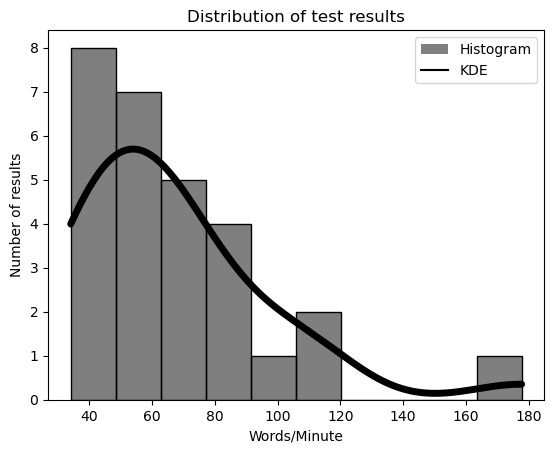

In [92]:
ax = sns.histplot(df["wpm"], bins=10, kde=True, color="black")
ax.set_title("Distribution of test results")
ax.set_xlabel("Words/Minute")
ax.set_ylabel("Number of results")

ax.lines[-1].set_linewidth(5)
ax.lines[-1].set_solid_capstyle("round")

ax.legend(handles=[
    Patch(
        facecolor=ax.patches[0].get_facecolor(),
        label="Histogram"
    ),
    Line2D(
        [0], [0],
        color=ax.lines[-1].get_color(),
        label="KDE"
    )
])

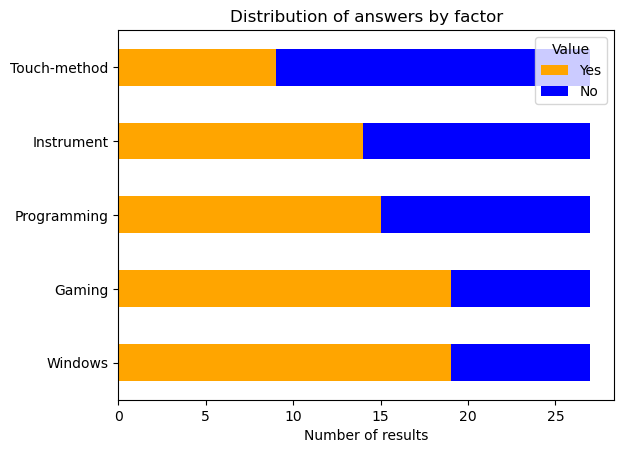

In [149]:
cols = ["touch", "instrument", "coding", "game", "windows"]

counts = df[cols].apply(lambda x: x.value_counts()).T.fillna(0)
counts = counts[[1, 0]]

ax = counts.plot(kind="barh", stacked=True, color=["orange", "blue"])
ax.set_title("Distribution of answers by factor")
ax.set_xlabel("Number of results")
ax.legend(title="Value", labels=["Yes", "No"])
ax.set_yticklabels(["Touch-method", "Instrument", "Programming", "Gaming", "Windows"])
ax.invert_yaxis()

<Axes: title={'center': 'Correlation heatmap'}>

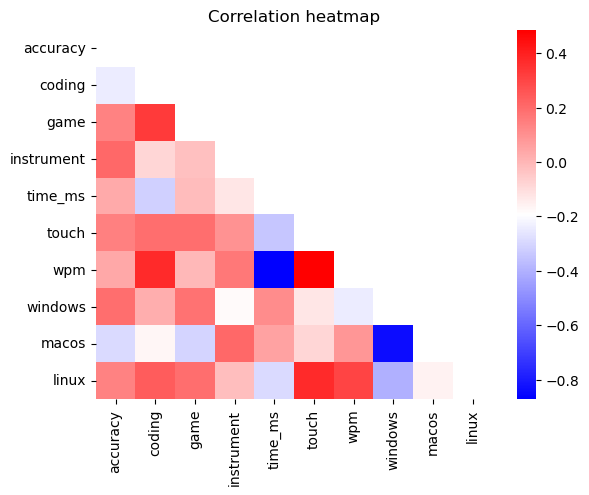

In [69]:
df_n = df.select_dtypes(include=["number"]).drop("raw_wpm", axis=1)
corr = df_n.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, cmap="bwr")
ax.set_title("Correlation heatmap")
ax

Text(0, 0.5, 'Words/Minute')

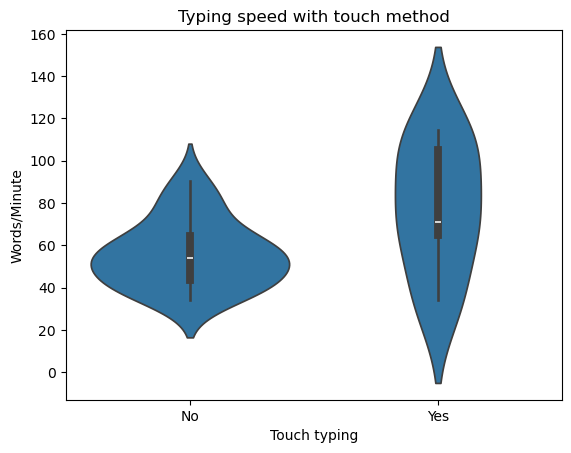

In [155]:
ax = sns.violinplot(x="touch", y="wpm", data=df)
ax.set_title("Typing speed with touch method")
ax.set_xticks([0, 1])
ax.set_xticklabels(["No", "Yes"])
ax.set_xlabel("Touch typing")
ax.set_ylabel("Words/Minute")

<Axes: xlabel='instrument', ylabel='wpm'>

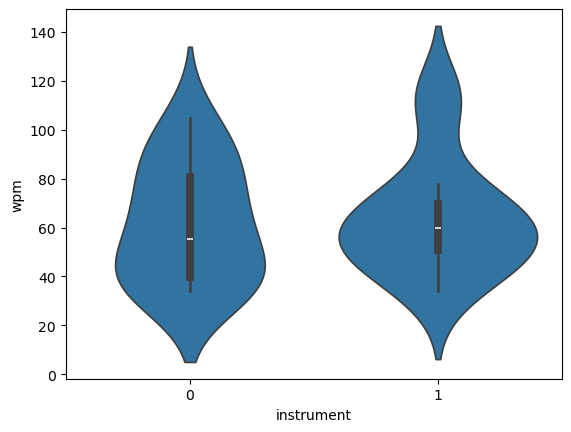

In [113]:
sns.violinplot(x="instrument", y="wpm", data=df)

<Axes: xlabel='coding', ylabel='wpm'>

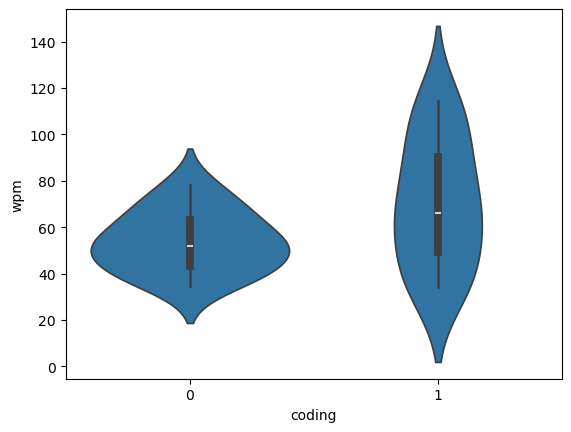

In [115]:
sns.violinplot(x="coding", y="wpm", data=df)

<Axes: xlabel='game', ylabel='wpm'>

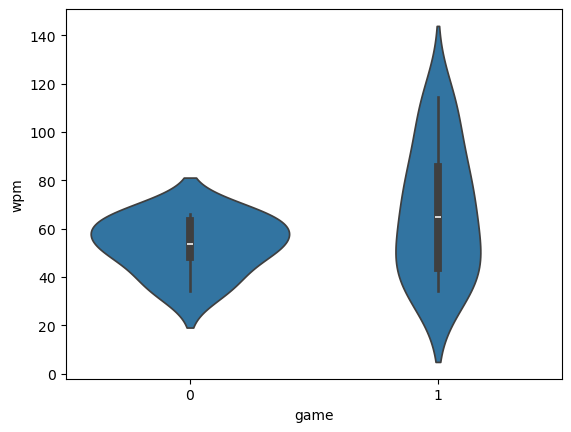

In [117]:
sns.violinplot(x="game", y="wpm", data=df)

Text(0, 0.5, 'Words/Minute')

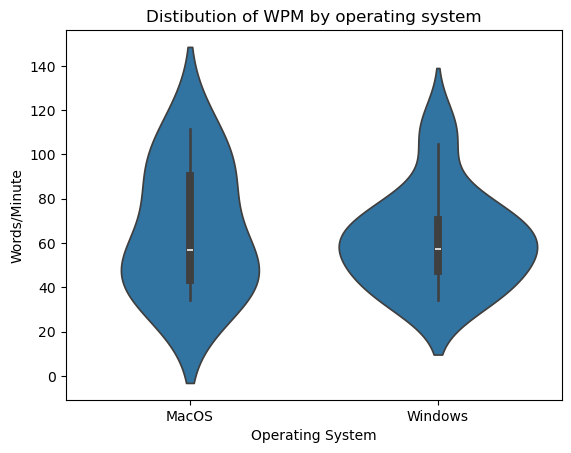

In [153]:
ax = sns.violinplot(x="windows", y="wpm", data=df)
ax.set_title("Distibution of WPM by operating system")
ax.set_xticks([0, 1])
ax.set_xticklabels(["MacOS", "Windows"])
ax.set_xlabel("Operating System")
ax.set_ylabel("Words/Minute")

[Text(0, 0, 'VG1'), Text(1, 0, 'VG2'), Text(2, 0, 'VG3')]

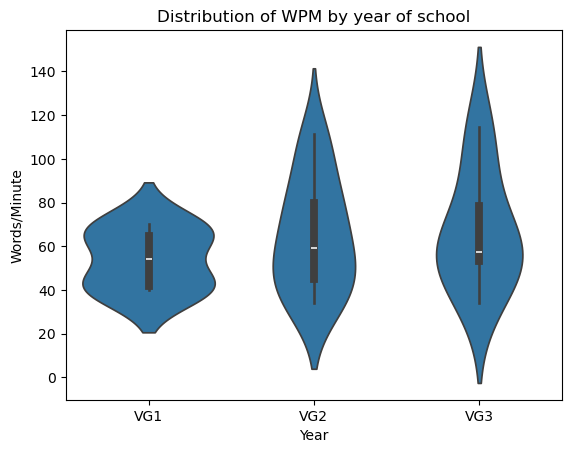

In [112]:
ax = sns.violinplot(x="year", y="wpm", data=df)
ax.set_title("Distribution of WPM by year of school")
ax.set_xlabel("Year")
ax.set_ylabel("Words/Minute")
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(["VG1", "VG2", "VG3"])

<Axes: xlabel='accuracy', ylabel='wpm'>

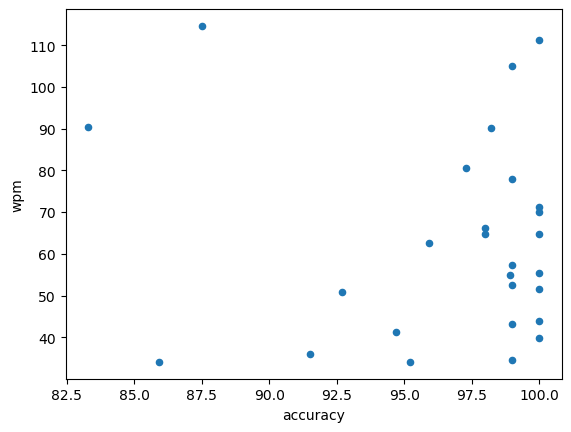

In [157]:
df.plot.scatter(x="accuracy", y="wpm")

(72.70817549747504, 100.0)

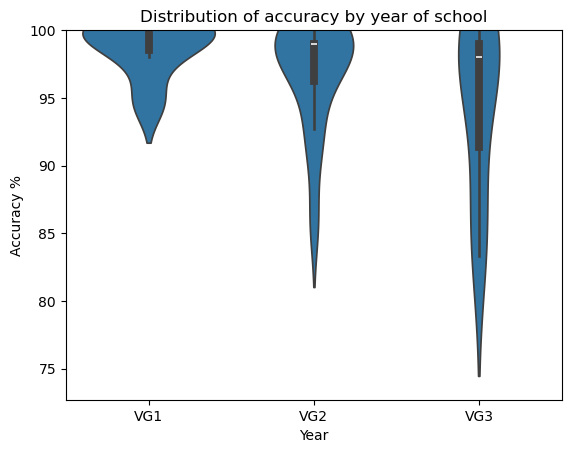

In [179]:
ax = sns.violinplot(x="year", y="accuracy", data=df)
ax.set_title("Distribution of accuracy by year of school")
ax.set_xlabel("Year")
ax.set_ylabel("Accuracy%")
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(["VG1", "VG2", "VG3"])
ax.set_ylim(top=100)